In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from rberga06.phylab import Datum as d
import math

In [4]:
# Load data
files = [pd.read_csv(f"data/TEK{i:05}.CSV", skiprows=15) for i in range(51)]
assert len(files) == 51

In [23]:
def zeri_v0(time: pd.Series, ch: pd.Series) -> list[float]:
    ch = ch - (ch.max() + ch.min())/2
    zeri: list[float] = []
    last_zero: list[float] = []
    last_i: int = -1
    for (_i, x) in time[ch.between(-1e-2,1e-2)].items():
        i2 = int(_i)
        if (i2 - last_i >= 5) and last_zero:
            # abbiamo trovato un nuovo zero
            zeri.append((last_zero[-1] + last_zero[0])/2)
            last_zero.clear()
        last_zero.append(x)
        last_i = i2
    if last_zero:
        zeri.append((last_zero[-1] + last_zero[0])/2)
    return zeri

def zeri_v1(time: pd.Series, ch: pd.Series, threshold: float = 0) -> list[float]:
    ch -= (ch.max() + ch.min())/2
    zeri: list[float] = []
    this_zero: list[float] = []
    last_t: float = 0
    last_y: float | None = None
    t: float; y: float
    for (t, y) in zip(time, ch):
        if -threshold <= y <= threshold:  # questo conta come zero
            this_zero.append(t)
        elif this_zero:  # è appena finito uno zero
            zeri.append(sum(this_zero)/len(this_zero))
            this_zero.clear()
            last_y = y
        elif last_y is not None and (
            (last_y + threshold) * (y - threshold) < 0 or
            (last_y - threshold) * (y + threshold) < 0
        ): # abbiamo appena oltrepassato uno zero
            zeri.append((last_t + t)/2)
        # prepara la prossima iterazione
        last_t, last_y = t, y
    return zeri

-[2]------------------------------------------------------------------------------
4.992012779552716 Hz, 5.00801282051282 Hz
5.0 Hz
Ampiezza CH1: 2.33 V
Ampiezza CH2: 2.3 V
Rapporto tra le ampiezze 98.71244635193132 %
Sfasamento:  399.84 % π/2
-[3]------------------------------------------------------------------------------
0.9984025559105428 Hz, 1.0 Hz
0.9992006394884091 Hz
Ampiezza CH1: 2.32 V
Ampiezza CH2: 2.3 V
Rapporto tra le ampiezze 99.13793103448276 %
Sfasamento:  399.68025579536373 % π/2
-[4]------------------------------------------------------------------------------
9.968102073365232 Hz, 10.01602564102564 Hz
9.992006394884093 Hz
Ampiezza CH1: 2.32 V
Ampiezza CH2: 2.3 V
Rapporto tra le ampiezze 99.13793103448276 %
Sfasamento:  399.6802557953637 % π/2
-[5]------------------------------------------------------------------------------
10.032102728731942 Hz, 10.064412238325282 Hz
10.04823151125402 Hz
Ampiezza CH1: 2.32 V
Ampiezza CH2: 2.3 V
Rapporto tra le ampiezze 99.137931034

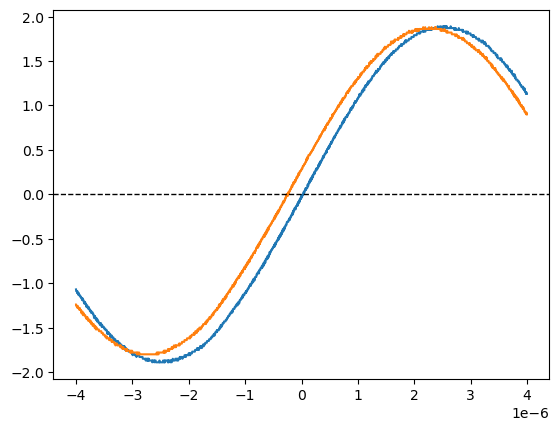

-[23]------------------------------------------------------------------------------
200320.5128205139 Hz, 124999999.99957466 Hz, 125000000.00000001 Hz, 200000.00000000003 Hz
399680.25579536374 Hz
Ampiezza CH1: 2.23 V
Ampiezza CH2: 2.1900000000000004 V
Rapporto tra le ampiezze 98.20627802690585 %
Sfasamento:  392.6458832933654 % π/2
-[24]------------------------------------------------------------------------------
499001.9960079841 Hz, 501002.0040080194 Hz, 498007.96812748665 Hz
499334.2210386152 Hz
Ampiezza CH1: 2.27 V
Ampiezza CH2: 2.23 V
Rapporto tra le ampiezze 98.23788546255507 %
Sfasamento:  0.5992010652462987 % π/2
-[25]------------------------------------------------------------------------------
999999.9999999999 Hz, 999999.9999999999 Hz, 1000000.0000000002 Hz
1000000.0 Hz
Ampiezza CH1: 2.0 V
Ampiezza CH2: 1.95 V
Rapporto tra le ampiezze 97.5 %
Sfasamento:  5.800000000000013 % π/2
-[26]------------------------------------------------------------------------------
5050505.05050

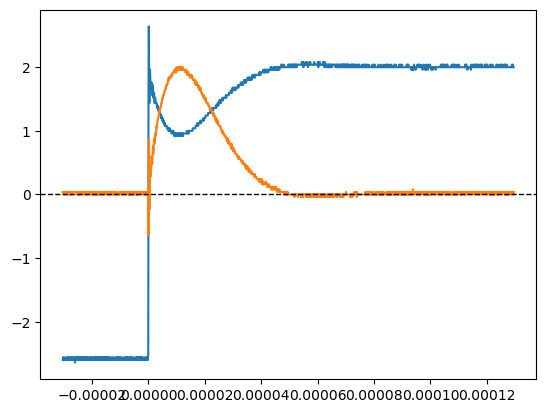

-[28]------------------------------------------------------------------------------

[i] Non ci sono abbastanza zeri per valutare il periodo, proverò con massimo e minimo!
17655.367231638418 Hz
Ampiezza CH1: 2.7 V
Ampiezza CH2: 1.1600000000000001 V
Rapporto tra le ampiezze 42.96296296296296 %
Sfasamento:  3.6723163841815363 % π/2


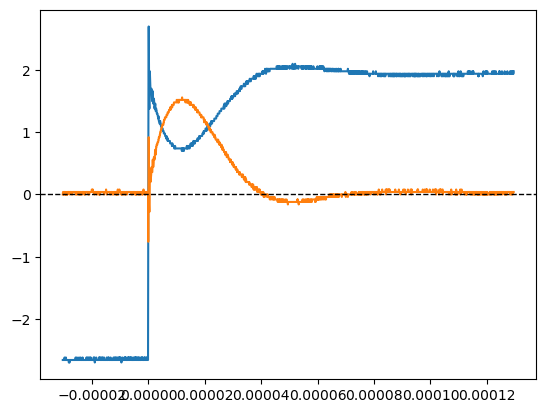

-[29]------------------------------------------------------------------------------

[i] Non ci sono abbastanza zeri per valutare il periodo, proverò con massimo e minimo!
16534.391534391536 Hz
Ampiezza CH1: 2.7 V
Ampiezza CH2: 1.74 V
Rapporto tra le ampiezze 64.44444444444444 %
{!} Errore: Non ho trovato zeri nel canale 2!
Sfasamento:  0.0 % π/2


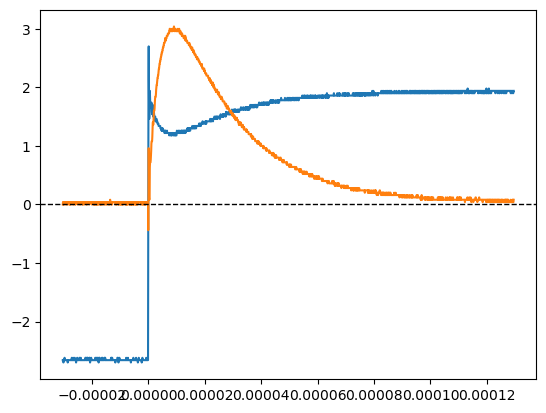

-[30]------------------------------------------------------------------------------

[i] Non ci sono abbastanza zeri per valutare il periodo, proverò con massimo e minimo!
711.8451025056829 Hz
Ampiezza CH1: 2.84 V
Ampiezza CH2: 2.12 V
Rapporto tra le ampiezze 74.64788732394368 %
Sfasamento:  23.576309794986567 % π/2


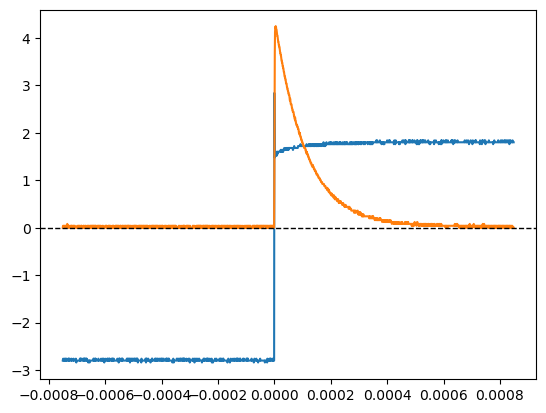

-[31]------------------------------------------------------------------------------
107758.62068965516 Hz, 25201.612903225807 Hz
40849.67320261438 Hz
Ampiezza CH1: 1.6099999999999999 V
Ampiezza CH2: 2.24 V
Rapporto tra le ampiezze 139.13043478260872 %
Sfasamento:  299.34640522875816 % π/2
-[32]------------------------------------------------------------------------------

[i] Non ci sono abbastanza zeri per valutare il periodo, proverò con massimo e minimo!
7530.120481927711 Hz
Ampiezza CH1: 2.66 V
Ampiezza CH2: 3.5 V
Rapporto tra le ampiezze 131.57894736842104 %
{!} Errore: Non ho trovato zeri nel canale 2!
Sfasamento:  0.0 % π/2


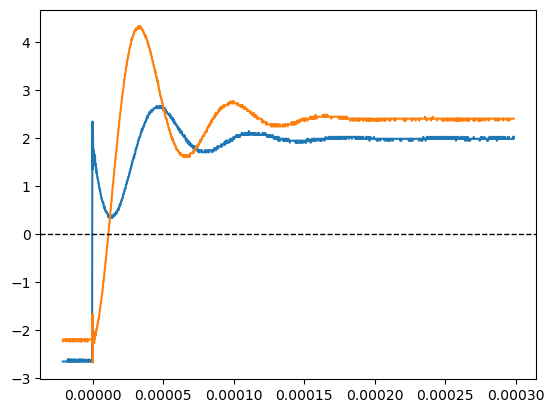

-[33]------------------------------------------------------------------------------

[i] Non ci sono abbastanza zeri per valutare il periodo, proverò con massimo e minimo!
45289.85507246377 Hz
Ampiezza CH1: 2.7 V
Ampiezza CH2: 3.76 V
Rapporto tra le ampiezze 139.25925925925924 %
Sfasamento:  231.15942028985526 % π/2


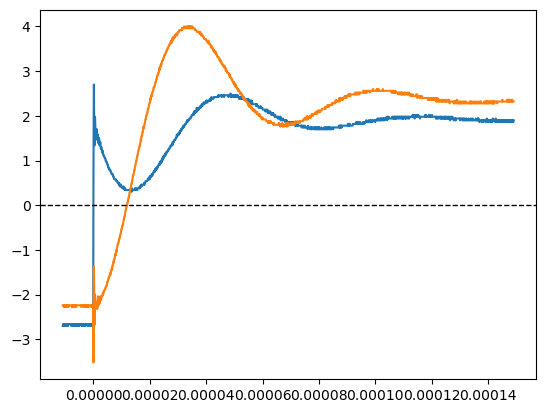

-[34]------------------------------------------------------------------------------
0.9992006394884093 Hz, 1.0024057738572576 Hz, 3.9308176100628938 Hz
1.3316761363636365 Hz
Ampiezza CH1: 2.32 V
Ampiezza CH2: 0.02 V
Rapporto tra le ampiezze 0.8620689655172415 %
Sfasamento:  206.53409090909088 % π/2
-[35]------------------------------------------------------------------------------
5.012028869286287 Hz, 1562.5000000000011 Hz, 5.0003333555570375 Hz
7.497251007963747 Hz
Ampiezza CH1: 2.32 V
Ampiezza CH2: 0.03 V
Rapporto tra le ampiezze 1.293103448275862 %
Sfasamento:  293.11252540735063 % π/2
-[36]------------------------------------------------------------------------------
10.008006405124101 Hz, 9.98402555910543 Hz, 10.01602564102564 Hz, 10.0 Hz, 10.012014417300762 Hz, 9.980039920159681 Hz
10.0 Hz
Ampiezza CH1: 2.32 V
Ampiezza CH2: 0.0195 V
Rapporto tra le ampiezze 0.8405172413793105 %
Sfasamento:  39.99999999999993 % π/2
-[37]------------------------------------------------------------

In [30]:
fasi5A, ampiezze15A, ampiezze25A, ampiezze_rapporto5A, frequenze5A = [], [], [], [], []
fasi5B, ampiezze15B, ampiezze25B, ampiezze_rapporto5B, frequenze5B = [], [], [], [], []

FINE_5A = 26
INIZIO_5B = 34

for (i, f) in enumerate(files):
    we_have_to_plot = False
    if i < 2: continue
    if i == FINE_5A or i == INIZIO_5B:
        print("="*80 + "\n" + "="*80)
    print(f"-[{i}]-" + "-"*77)
    time, ch1, ch2 = f["TIME"], f["CH1"], f["CH2"]
    fasi, ampiezze1, ampiezze2, ampiezze_rapporto, frequenze = (
        (fasi5A, ampiezze15A, ampiezze25A, ampiezze_rapporto5A, frequenze5A) if i <= FINE_5A else
        (fasi5B, ampiezze15B, ampiezze25B, ampiezze_rapporto5B, frequenze5B) if i >= INIZIO_5B else
        ([], [], [], [], [])
    )

    _zeri = zeri_v1(time, ch1)
    _diffs = [_zeri[i] - _zeri[i-1] for i in range(1, len(_zeri))]
    print(*[f"{1 / (2*x)} Hz" for x in _diffs], sep=", ")
    if len(_zeri) > 1:
        T = 2 * (sum(_diffs)/(len(_zeri)-1))
    else:
        print("[i] Non ci sono abbastanza zeri per valutare il periodo, proverò con massimo e minimo!")
        we_have_to_plot = True
        t_max, t_min = time[idx_max := ch1.idxmax()], time[idx_min := ch1.idxmin()]
        if ch1[idx_max] < 0:
            print("{!} Errore: Il massimo è negativo!")
            T = 0
        elif ch1[idx_min] > 0:
            print("{!} Errore: Il minimo è positivo!")
            T = 0
        else:
            T = 2 * abs(t_max - t_min)
    if T != 0:
        print(_f := 1/T, "Hz")
        frequenze.append(_f)
    else:
        frequenze.append(0)
        print("{!} Errore: Il periodo è venuto pari a zero!")
        we_have_to_plot = True

    print("Ampiezza CH1:", _A1 := (ch1.max() - ch1.min())/2, "V")
    print("Ampiezza CH2:", _A2 := (ch2.max() - ch2.min())/2, "V")
    print("Rapporto tra le ampiezze", (_A12 := _A2/_A1) * 100, "%")
    ampiezze1.append(_A1)
    ampiezze2.append(_A2)
    ampiezze_rapporto.append(_A12)


    if (_zeri_ch2 := zeri_v0(time, ch2)) and _zeri:
        dt = _zeri_ch2[0] - _zeri[0]
    else:
        if not _zeri_ch2:
            print("{!} Errore: Non ho trovato zeri nel canale 2!")
        we_have_to_plot = True
        dt = 0
    if T != 0:
        print("Sfasamento: ", ((phi := dt / T) * 400) % 400, "% π/2")
        fasi.append(phi)
    else:
        fasi.append(0)

    if we_have_to_plot:
        fig, ax = plt.subplots()
        ax.plot(time, ch1 - (ch1.max() + ch1.min())/2)
        ax.plot(time, ch2)
        ax.axhline(0, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        plt.show()

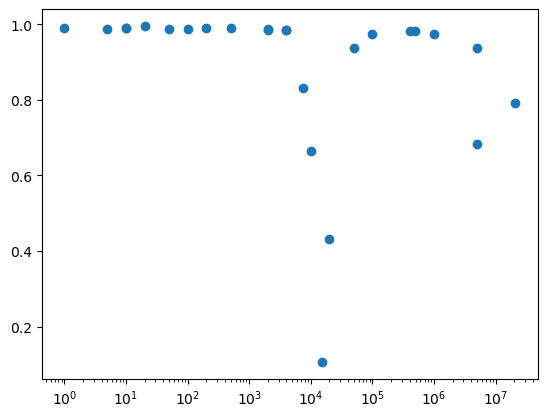

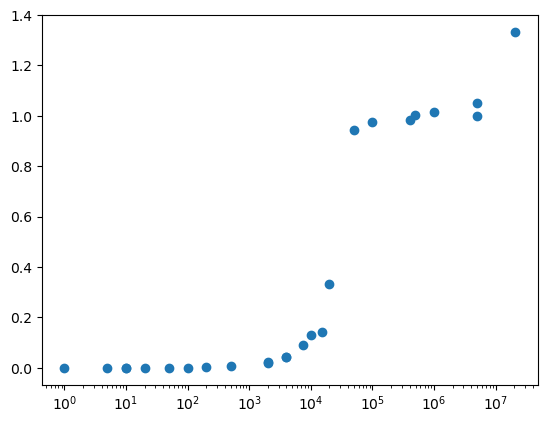

In [37]:
fig, ax = plt.subplots()
ax.scatter(frequenze5A, ampiezze_rapporto5A)
ax.set_xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.scatter(frequenze5A, [(phi % 1 if abs(phi) > 1 else phi) + int(nu >= 4e4) for (nu, phi) in zip(frequenze5A, fasi5A)])
ax.set_xscale('log')
plt.show()

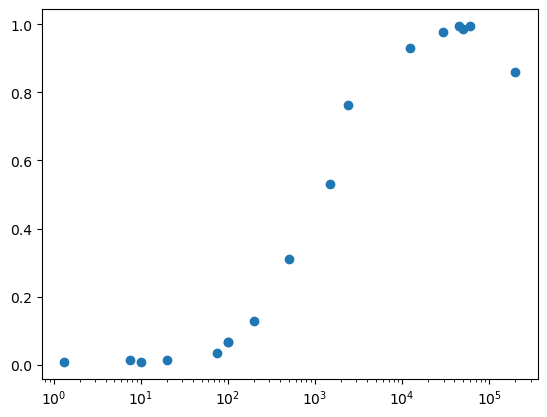

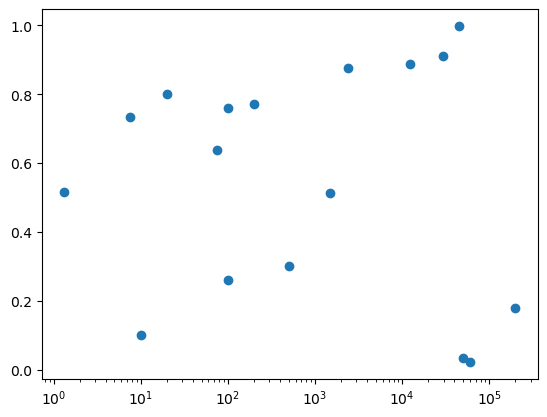

In [ ]:
fig, ax = plt.subplots()
ax.scatter(frequenze5B, ampiezze_rapporto5B)
ax.set_xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.scatter(frequenze5B, [phi % 1 for (nu, phi) in zip(frequenze5B, fasi5B)])
ax.set_xscale('log')
plt.show()